In [269]:
%load_ext autoreload 
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [270]:
from src.lights import change_lights
from src.main import generate_scenario, run_scenario
from src.logger import ExperimentLogger

from utils.common import do_test_steps, create_simulator, get_camera_matrix, place_agent

In [271]:
DEBUG = True

In [272]:
sim_settings_path = 'configs/sim_settings.json'

if DEBUG:
    light_settings_path = 'configs/test_light_settings.json'
else:
    light_settings_path = 'configs/light_settings.json'

In [273]:
logger = ExperimentLogger(sim_settings_path, light_settings_path)

sim_settings, light_settings = logger.get_settings()

In [274]:
try:
    sim.close()
except NameError:
    pass

sim = create_simulator(sim_settings)

[23:03:12:428099]:[Warning]:[Assets] ResourceManager.cpp(369)::loadSemanticSceneDescriptor : SSD File Naming Issue! Neither SceneInstanceAttributes-provided name : `./../data/scene_datasets/gibson/Adrian.scn` nor constructed filename : `./../data/scene_datasets/gibson/info_semantic.json` exist on disk.
[23:03:15:799894]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 0


Renderer: NVIDIA GeForce GTX 1050 Ti/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 545.23.08
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits


NavMesh area = 61.986087799072266
Bounds =  [-12.587733   -1.1379594  -8.685393 ] [2.204035  3.9217181 1.2113949]
Random navigable points :  [-10.055799     0.06204069  -3.749935  ] [-10.606106     0.06204069  -4.793065  ] [-9.07972     0.06204069 -2.4279234 ] [-1.4455601 -0.9379594 -2.4460888] [-11.719033     0.06204069  -1.4918416 ] [-10.879499     0.06204069  -4.5374284 ] [-0.27842927 -0.9379594  -1.6375524 ] [-8.351735    0.06204069 -6.098658  ] [-1.1835573 -0.9379594 -1.4681842] [ 0.1995678 -0.9379594 -2.194263 ]
Are points navigable? True
Start point : [-8.463763    0.06204069 -1.1780974 ]


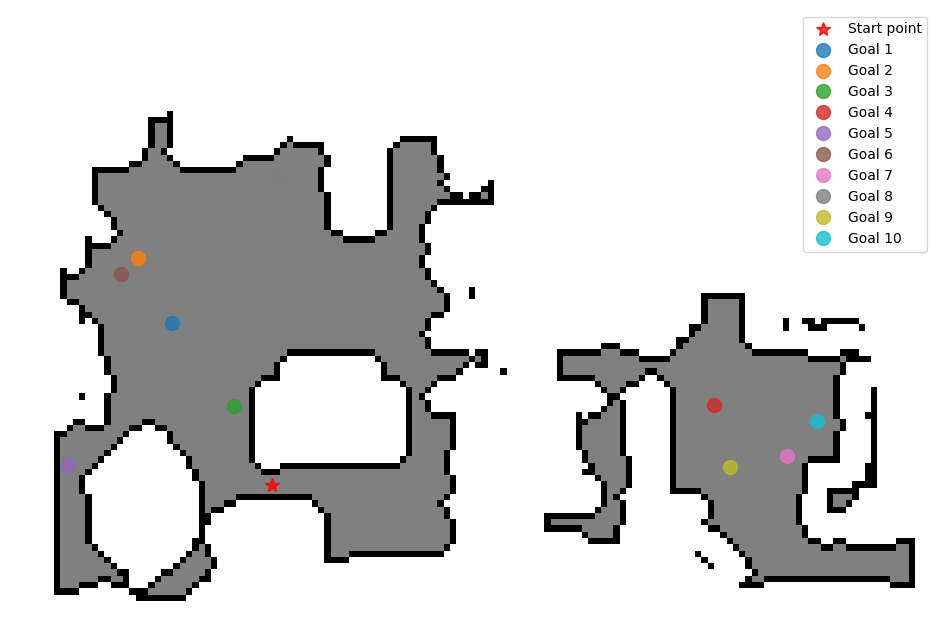

In [275]:
start_point, navigatable_points = generate_scenario(sim, sim_settings)

In [276]:
sim = place_agent(sim, sim_settings, start_point)

In [277]:
assert all(sim.agents[sim_settings['default_agent']].get_state().position == start_point)

[23:03:19:694768]:[Warning]:[Assets] ResourceManager.cpp(369)::loadSemanticSceneDescriptor : SSD File Naming Issue! Neither SceneInstanceAttributes-provided name : `./../data/scene_datasets/gibson/Adrian.scn` nor constructed filename : `./../data/scene_datasets/gibson/info_semantic.json` exist on disk.
[23:03:19:701853]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 1


action turn_right


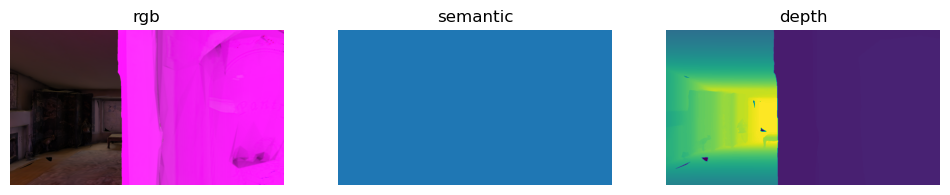

action turn_left


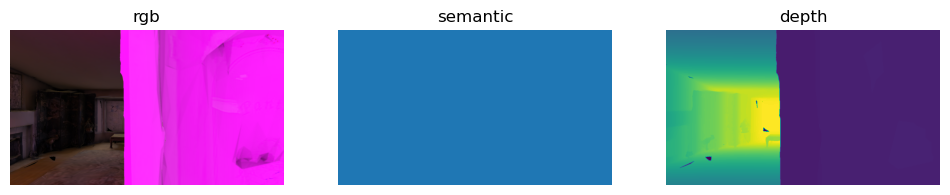

action turn_right


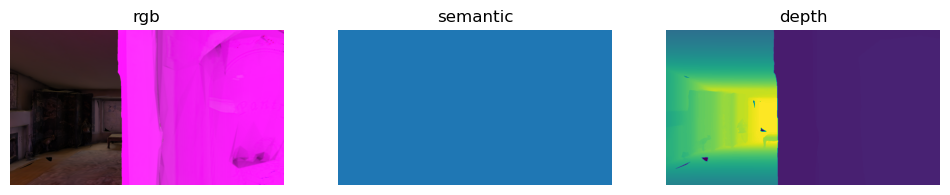

action move_forward


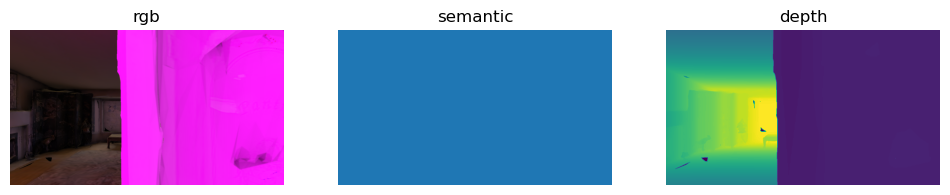

action turn_right


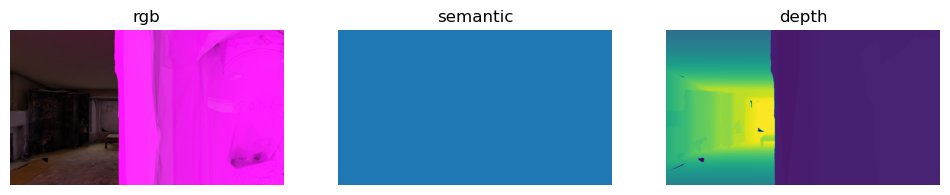

In [278]:
if DEBUG:
    sim, _ = change_lights(sim, sim_settings, light_settings, life_index=0)
    do_test_steps(sim, sim_settings, max_frames=5)

In [279]:
run_scenario(sim, sim_settings, light_settings, navigatable_points, logger)

  0%|          | 0/10 [00:00<?, ?it/s][23:03:23:640990]:[Warning]:[Assets] ResourceManager.cpp(369)::loadSemanticSceneDescriptor : SSD File Naming Issue! Neither SceneInstanceAttributes-provided name : `./../data/scene_datasets/gibson/Adrian.scn` nor constructed filename : `./../data/scene_datasets/gibson/info_semantic.json` exist on disk.
[23:03:23:647717]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 2


Light setup: [{'vector': [0.0, 0.0, 0.0, 1.0], 'color': [10.0, 0.0, 0.0], 'model': <LightPositionModel.Camera: 0>}, {'vector': [0.0, 0.0, 0.0, 1.0], 'color': [0.0, 0.0, 10.0], 'model': <LightPositionModel.Camera: 0>}]


  0%|          | 0/10 [00:11<?, ?it/s]


KeyboardInterrupt: 

In [280]:
K = get_camera_matrix(sim.agents[sim_settings['default_agent']])

In [281]:
print(f"camera_matrix = \n{K}\n\ndepth_scale = {sim_settings['depth_scale']}")

camera_matrix = 
[[600.    0.  339.5]
 [  0.  600.  599.5]
 [  0.    0.    1. ]]

depth_scale = 6553.5


In [282]:
!rm generated.zip
!zip -r generated.zip generated/

  adding: generated/ (stored 0%)
  adding: generated/gibson/ (stored 0%)
  adding: generated/gibson/Adrian/ (stored 0%)
  adding: generated/gibson/Adrian/log.txt (deflated 56%)
  adding: generated/gibson/Adrian/sim_settings.json (deflated 64%)
  adding: generated/gibson/Adrian/results/ (stored 0%)
  adding: generated/gibson/Adrian/light_settings.json (deflated 80%)
